In [2]:
import numpy as np
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

/usr/local/var/pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/var/pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [11]:
def rank_backsort(x):
    y = np.sort(x)
    y = y[::-1]
    z = np.zeros(len(x))
    
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            if(x[i] == y[j]):
                z[i] = j+1
                break
    return z


def r_calc(test,pred):
    n=len(test)
    ave_test = np.sum(test)/n
    ave_pred = np.sum(pred)/n
    a=0
    b=0
    c=0
    for i in range(0,len(test)):
        a += (test[i] - ave_test)*(pred[i] - ave_pred)
        b += (test[i] - ave_test)**2
        c += (pred[i] - ave_pred)**2
    
    a2 = a/n
    b2 = (b/n)**0.5
    c2 = (c/n)**0.5
    return a2/(b2*c2)

def prediction(x):
    tuned_parameters = [
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['linear']},
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['rbf'], 'gamma': [2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ]},
    ]
    
    path = 'CSV folder/全体_公式_最終.csv'
    
    with open(path,mode='a') as f:
        data = np.loadtxt("CSV folder/furukawa_全体_修正_rank順_名前なし.csv",delimiter=",",dtype=float)
        feature = data[:,0:x]
        label = data[:,-1]

        scaler = StandardScaler()
        scaler.fit(feature)
        feature = scaler.transform(feature)
        
        count=0
        for i in range(10):
            kf = KFold(n_splits = 5, shuffle = True)
            for train_index, test_index in kf.split(feature):
                train_feature, train_label, test_feature, test_label = np.array(feature)[train_index], np.array(label)[train_index], np.array(feature)[test_index], np.array(label)[test_index]

                grid = GridSearchCV(SVR(),tuned_parameters,cv=5,scoring='r2')
                grid.fit(train_feature,train_label)

                clf = SVR(C=grid.best_params_['C'],kernel='rbf',gamma=grid.best_params_['gamma'],epsilon=0.1)
                clf.fit(train_feature, train_label)
                pred = clf.predict(test_feature)

                if(count==49):
                    f.write(str(r2_score(test_label,pred)))
                else:
                    f.write(str(r2_score(test_label,pred)))
                    f.write(",")
                count += 1
        f.write("\n")
    return 

def re_prediction(x):
    tuned_parameters = [
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['linear']},
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['rbf'], 'gamma': [2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ]},
    ]
    
    path = 'CSV folder/全体_公式_最終2.csv'
    
    with open(path,mode='a') as f:
        data = np.loadtxt("CSV folder/furukawa_全体_修正_rank順_名前なし.csv",delimiter=",",dtype=float)
        feature = data[:,0:x]
        label = data[:,-1]

        scaler = StandardScaler()
        scaler.fit(feature)
        feature = scaler.transform(feature)
        count=0
        for i in range(10):
            kf = KFold(n_splits = 5, shuffle = True)
            for train_index, test_index in kf.split(feature):
                train_feature, train_label, test_feature, test_label = np.array(feature)[train_index], np.array(label)[train_index], np.array(feature)[test_index], np.array(label)[test_index]

                grid = GridSearchCV(SVR(),tuned_parameters,cv=5,scoring='r2')
                grid.fit(train_feature,train_label)

                clf = SVR(C=grid.best_params_['C'],kernel='rbf',gamma=grid.best_params_['gamma'],epsilon=0.1)
                clf.fit(train_feature, train_label)
                pred = clf.predict(test_feature)

                if(count==49):
                    f.write(str(r2_score(test_label,pred)))
                else:
                    f.write(str(r2_score(test_label,pred)))
                    f.write(",")
                count += 1
        f.write("\n")
    return 
def re2_prediction(x):
    tuned_parameters = [
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['linear']},
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['rbf'], 'gamma': [2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ]},
    ]
    
    path = 'CSV folder/全体_公式_最終re.csv'
    
    with open(path,mode='a') as f:
        data = np.loadtxt("CSV folder/furukawa_全体_修正_rank順_名前なし.csv",delimiter=",",dtype=float)
        feature = data[:,0:x]
        label = data[:,-1]

        scaler = StandardScaler()
        scaler.fit(feature)
        feature = scaler.transform(feature)
        count=0
        for i in range(10):
            kf = KFold(n_splits = 5, shuffle = True)
            for train_index, test_index in kf.split(feature):
                train_feature, train_label, test_feature, test_label = np.array(feature)[train_index], np.array(label)[train_index], np.array(feature)[test_index], np.array(label)[test_index]

                grid = GridSearchCV(SVR(),tuned_parameters,cv=5,scoring='r2')
                grid.fit(train_feature,train_label)

                clf = SVR(C=grid.best_params_['C'],kernel='rbf',gamma=grid.best_params_['gamma'],epsilon=0.1)
                clf.fit(train_feature, train_label)
                pred = clf.predict(test_feature)

                if(count==49):
                    f.write(str(r2_score(test_label,pred)))
                else:
                    f.write(str(r2_score(test_label,pred)))
                    f.write(",")
                count += 1
        f.write("\n")
    return 






def RF_prediction(x):
    tuned_parameters = {'n_estimators'  : [10, 100, 1000, 10000], 'max_features' : ['auto','sqrt','log2']}
    
    path = 'CSV folder/全体_RF_公式.csv'
    
    with open(path,mode='a') as f:
        data = np.loadtxt("CSV folder/furukawa_全体_rank順_名前なし.csv",delimiter=",",dtype=float)
        feature = data[:,0:x]
        label = data[:,-1]
        RF=RandomForestRegressor()
        count = 0
        for i in range(10):
            kf = KFold(n_splits = 5, shuffle = True)
            for train_index, test_index in kf.split(feature):
                train_feature, train_label, test_feature, test_label = np.array(feature)[train_index], np.array(label)[train_index], np.array(feature)[test_index], np.array(label)[test_index]
                grid = GridSearchCV(RF,tuned_parameters,cv=5,scoring='r2')
                grid.fit(train_feature,train_label)

                regr = RF(n_estimators=grid.best_params_['n_estimators'],max_features=grid.best_params_['max_features'])
                regr.fit(train_feature, train_label)
                pred = regr.predict(test_feature)

                if(count==49):
                    f.write(str(r2_score(test_label,pred)))
                else:
                    f.write(str(r2_score(test_label,pred)))
                    f.write(",")
                count += 1
        f.write("\n")
    return 

def heatmap_geidsearchCV(grid):
    CV=grid.grid_scores_[14:]
    heatmap_list=[]
    for i in range(len(CV)):
        if("kernel" in CV[i][0].keys()):
            del CV[i][0]['kernel']
        CV[i][0].setdefault('$R^2$', CV[i][1])
        heatmap_list.append(CV[i][0])
    
    df=pd.DataFrame(heatmap_list)
    
    data = df.pivot(index="gamma", columns="C", values="$R^2$")
    plt.figure(figsize=(11, 8))
    ax=sns.heatmap(data, annot=True, fmt='.2f',cmap="RdBu_r")
    ax.collections[0].colorbar.set_label("$R^2$")
    return ax

In [3]:
data=np.loadtxt("CSV folder/furukawa_全体_分散0除去_名前なし.csv",delimiter=",",dtype=float)
feature = data[:,:-1]
label = data[:,-1]

tuned_parameters = {'n_estimators'  : [10, 100, 1000, 10000], 'max_features' : ['auto','sqrt','log2']}

grid = GridSearchCV(RandomForestRegressor(),tuned_parameters,cv=5,scoring='r2') # モデルの評価関数の指定
grid.fit(feature,label)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 1000, 10000], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [4]:
importance=np.zeros(len(feature[0]))
regr = RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'],max_features=grid.best_params_['max_features'])
kf = KFold(n_splits = 5, shuffle = True)
for train_index, test_index in kf.split(feature):
    train_feature, train_label, test_feature, test_label = np.array(feature)[train_index], np.array(label)[train_index], np.array(feature)[test_index], np.array(label)[test_index]
    regr.fit(train_feature,train_label)
    importance += regr.feature_importances_ 

In [5]:
rank_index = rank_backsort(importance)

In [8]:
file=open("CSV folder/wang_全体_修正_rank順_名前付き.csv","w")
data = np.loadtxt('CSV folder/wang_全体_分散0除去.csv', delimiter=',', dtype=str)
feature=data[:,:-1]
label = data[:,-1]

for i in range(38):
    for j in range(1,len(feature[0])+1):
            for k in range(len(feature[0])):
                if(j==rank_index[k]):
                    file.write(feature[i][k])
                    file.write(",")
    file.write(label[i])
    file.write("\n")
file.close()

In [9]:
file=open("CSV folder/furukawa_全体_修正_rank順_名前付き.csv","w")
data = np.loadtxt('CSV folder/furukawa_全体_分散0除去.csv', delimiter=',', dtype=str)
feature=data[:,0:-1]
label = data[:,-1]

for i in range(394):
    for j in range(1,len(feature[0])+1):
            for k in range(len(feature[0])):
                if(j==rank_index[k]):
                    file.write(feature[i][k])
                    file.write(",")
    file.write(label[i])
    file.write("\n")
file.close()

# RandomForestでやってみる

In [ ]:
for i in range(10):
    RF_prediction((i+1)*5)

In [24]:
num

array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 154])

# SVRの方が先

In [4]:
for i in range(8):
    prediction((i+1)*5+110)
prediction(154)

In [16]:
num=np.array(range(5,155,5))
num=np.array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150,154])

In [8]:
data=np.loadtxt("CSV folder/全体_公式_最終.csv",delimiter=",",dtype=float)
average=np.zeros(31)
stdd=np.zeros(31)
for i in range(31):
    average[i]=sum(data[i])/len(data[i])
    stdd[i]=np.std(data[i])

Text(0,0.5,'$R^2$')

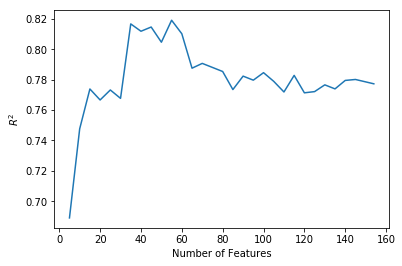

In [18]:

plt.plot(num,average)

plt.xlabel("Number of Features")
plt.ylabel("$R^2$")


In [12]:
for i in range(9):
    if(i+31 != 35):
        re2_prediction(i+31)

In [20]:
for i in range(9):
    if(i+51 != 55):
        re_prediction(i+51)

In [19]:
average

array([0.6890017 , 0.74765447, 0.7738909 , 0.76664534, 0.77322976,
       0.76769992, 0.81671772, 0.81188748, 0.81466509, 0.80466706,
       0.81913282, 0.81023547, 0.78757374, 0.7907243 , 0.78806555,
       0.78538885, 0.77349856, 0.7823441 , 0.77968596, 0.78461654,
       0.77890189, 0.77191094, 0.78283766, 0.77135263, 0.77215094,
       0.77660141, 0.77394159, 0.77951652, 0.78014236, 0.77855668,
       0.77728296])

In [21]:
data=np.loadtxt("CSV folder/全体_公式_最終2.csv",delimiter=",",dtype=float)
average2=np.zeros(8)
for i in range(8):
    average2[i]=sum(data[i])/len(data[i])

In [22]:
average2

array([0.80600545, 0.81073859, 0.80478118, 0.8014314 , 0.80221509,
       0.81947467, 0.81437931, 0.81296993])

In [28]:
average_=np.array([0.6890017 , 0.74765447, 0.7738909 , 0.76664534, 0.77322976,
       0.76769992, 0.81671772, 0.81188748, 0.81466509, 0.80466706,
       0.80600545, 0.81073859, 0.80478118, 0.8014314 , 0.81913282, 
       0.80221509, 0.81947467, 0.81437931, 0.81296993, 0.81023547, 0.78757374, 0.7907243 , 0.78806555,
       0.78538885, 0.77349856, 0.7823441 , 0.77968596, 0.78461654,
       0.77890189, 0.77191094, 0.78283766, 0.77135263, 0.77215094,
       0.77660141, 0.77394159, 0.77951652, 0.78014236, 0.77855668,
       0.77728296])

Text(0,0.5,'$R^2$')

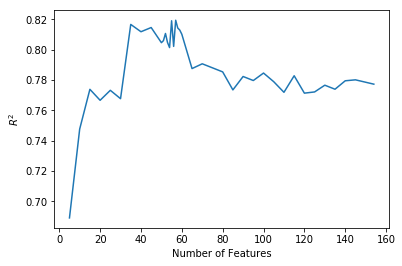

In [29]:
num2=np.array([5,  10,  15,  20,  25,  30,  35,  40,  45,  50,51,52,53,54,  55,56,57,58,59 ,60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 154])
plt.plot(num2,average_)

plt.xlabel("Number of Features")
plt.ylabel("$R^2$")

TypeError: ylabel() got multiple values for argument 's'

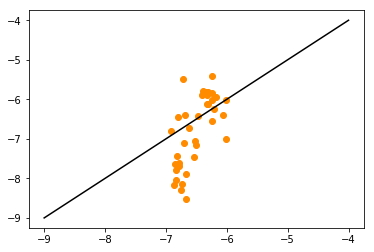

In [13]:
pdf = PdfPages('pdf folder/all.pdf')
plt.figure()


x = np.linspace(-9,-4)  
y = x              
plt.plot(x,y,color="black")      

y1 = pred
y2 = test_label
plt.scatter(y1,y2,color="darkorange")

plt.ylabel('obserbed Log$P_{app}$')
plt.xlabel('predicted Log$P_{app}$')
plt.plot()


pdf.savefig()
pdf.close()

In [9]:
grid.best_params_['gamma']

0.015625

SVR: r2 0.209246, RMSE 0.787372, r 0.661508


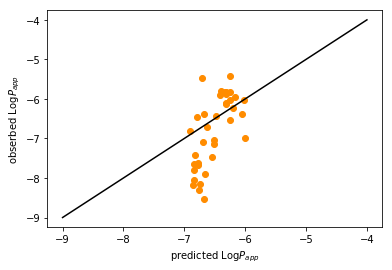

In [4]:
tuned_parameters = [
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['linear']},
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['rbf'], 'gamma': [2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ]},
    ]

x=57
train_data = np.loadtxt("CSV folder/furukawa_全体_修正_rank順_名前なし.csv",delimiter=",",dtype=float)
test_data = np.loadtxt("CSV folder/wang_全体_修正_rank順_名前なし.csv",delimiter=",",dtype=float)

train_feature=train_data[:,0:x]
train_label=train_data[:,-1]

test_feature=test_data[:,0:x]
test_label=test_data[:,-1]

std=StandardScaler()
std.fit(train_feature)
train_feature=std.transform(train_feature)
test_feature=std.transform(test_feature)

for i in range(len(test_feature)):
    for j in range(len(test_feature[0])):
        if(test_feature[i][j]<-3):
            test_feature[i][j] = -3
        elif(test_feature[i][j]>3):
            test_feature[i][j]=3


grid=GridSearchCV(SVR(),tuned_parameters,cv=5,scoring="r2")
grid.fit(train_feature,train_label)


reg=SVR(C=grid.best_params_['C'],kernel="rbf",gamma=grid.best_params_['gamma'])
reg.fit(train_feature,train_label)
pred = reg.predict(test_feature)
r = r_calc(test_label,pred)
r2 = r2_score(test_label,pred)
rmse = (mean_squared_error(test_label,pred))**0.5


x = np.linspace(-9,-4)  
y = x              
plt.plot(x,y,color="black")      

y1 = pred
y2 = test_label
plt.scatter(y1,y2,color="darkorange")

plt.ylabel('obserbed Log$P_{app}$')
plt.xlabel('predicted Log$P_{app}$')
plt.plot()



print ("SVR: r2 %f, RMSE %f, r %f" % (r2, rmse, r))

In [60]:
data=np.loadtxt("CSV folder/全体_公式.csv",delimiter=",",dtype=float)
average=np.zeros(17)
std_=np.zeros(17)
for i in range(17):
    average[i]=sum(data[i])/len(data[i])
    std_[i]=np.std(data[i])

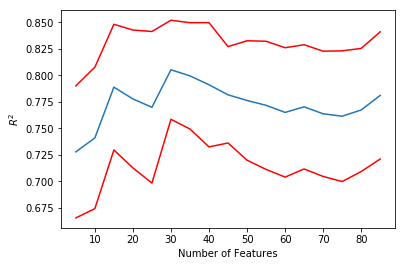

In [66]:
num=np.array(range(5,90,5))

pdf = PdfPages('pdf folder/r2_all__.pdf')
plt.figure()
plt.plot(num,average+std_,color="red")
plt.plot(num,average)
plt.plot(num,average-std_,color="red")
plt.xlabel("Number of Features")
plt.ylabel("$R^2$")
pdf.savefig()
pdf.close()


In [48]:
average

array([0.72787095, 0.74105223, 0.78894204, 0.77778394, 0.76994534,
       0.80531013, 0.79955538, 0.79116934, 0.78169664, 0.77636215,
       0.77178554, 0.76511129, 0.77034923, 0.7637932 , 0.76152884,
       0.76740607, 0.78112854])

In [50]:
average3=np.array([0.80940994, 0.80813238, 0.80267734, 0.80814285, 0.80531013,
       0.80079764, 0.80660751, 0.80007519, 0.79954771])

In [25]:
for i in range(9):
    re_prediction(i+26)

In [51]:
data=np.loadtxt("CSV folder/全体_公式2.csv",delimiter=",",dtype=float)
average2=np.zeros(9)
for i in range(9):
    average2[i]=sum(data[i])/len(data[i])
num2=np.array(range(26,35))

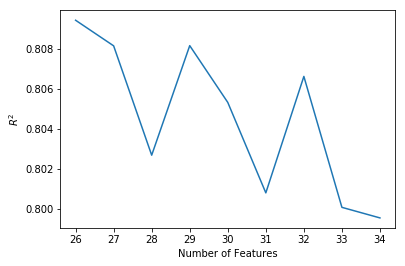

In [53]:
pdf = PdfPages('pdf folder/r2_all_2.pdf')
plt.figure()
plt.plot(num2,average3)
plt.xlabel("Number of Features")
plt.ylabel("$R^2$")
pdf.savefig()
pdf.close()

In [37]:
feature=[]
feature.extend(num)
feature.extend(num2)
feature.sort()
feature=list(set(feature))

In [31]:
result=np.array([0.72787095, 0.74105223, 0.78894204, 0.77778394, 0.76994534,
                0.80940994, 0.80813238, 0.80267734, 0.80814285, 0.80531013,
       0.80079764, 0.80660751, 0.80007519, 0.79954771, 0.79955538, 0.79116934, 0.78169664, 0.77636215,
       0.77178554, 0.76511129, 0.77034923, 0.7637932 , 0.76152884,
       0.76740607, 0.78112854])

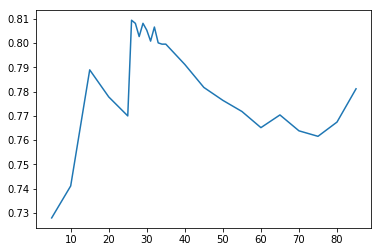

In [38]:
plt.plot(feature,result)

SVR: r2 0.375439, RMSE 0.699756, r 0.761298


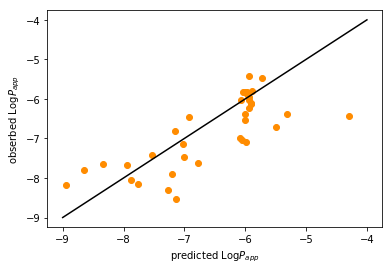

In [67]:
tuned_parameters = [
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['linear']},
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['rbf'], 'gamma': [2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ]},
    ]


train_data = np.loadtxt("CSV folder/furukawa_全体_rank順_名前なし.csv",delimiter=",",dtype=float)
test_data = np.loadtxt("CSV folder/wang_全体_rank順_名前なし.csv",delimiter=",",dtype=float)

train_feature=train_data[:,0:26]
train_label=train_data[:,-1]

test_feature=test_data[:,0:26]
test_label=test_data[:,-1]

std=StandardScaler()
std.fit(train_feature)
train_feature=std.transform(train_feature)
test_feature=std.transform(test_feature)

grid=GridSearchCV(SVR(),tuned_parameters,cv=5,scoring="r2")
grid.fit(train_feature,train_label)


reg=SVR(C=grid.best_params_['C'],kernel="rbf",gamma=grid.best_params_['gamma'])
reg.fit(train_feature,train_label)
pred = reg.predict(test_feature)
r = r_calc(test_label,pred)
r2 = r2_score(test_label,pred)
rmse = (mean_squared_error(test_label,pred))**0.5


x = np.linspace(-9,-4)  
y = x              
plt.plot(x,y,color="black")      

y1 = pred
y2 = test_label
plt.scatter(y1,y2,color="darkorange")

plt.ylabel('obserbed Log$P_{app}$')
plt.xlabel('predicted Log$P_{app}$')
plt.plot()



print ("SVR: r2 %f, RMSE %f, r %f" % (r2, rmse, r))

SVR: r2 0.375439, RMSE 0.699756, r 0.761298


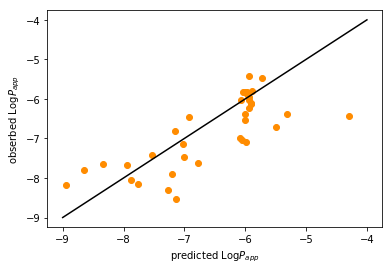

In [45]:

pdf = PdfPages('pdf folder/all_26.pdf')
plt.figure()
x = np.linspace(-9,-4)  
y = x              
plt.plot(x,y,color="black")      

y1 = pred
y2 = test_label
plt.scatter(y1,y2,color="darkorange")

plt.ylabel('obserbed Log$P_{app}$')
plt.xlabel('predicted Log$P_{app}$')
plt.plot()

pdf.savefig()
pdf.close()

print ("SVR: r2 %f, RMSE %f, r %f" % (r2, rmse, r))

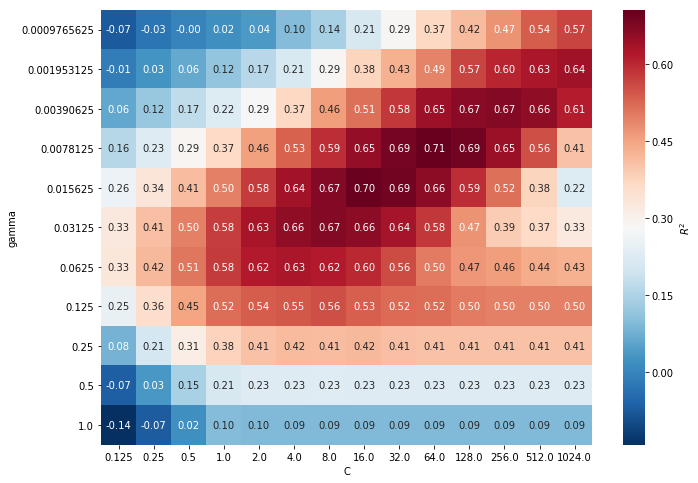

In [44]:
pdf = PdfPages('pdf folder/all_grid_result.pdf')
heatmap_geidsearchCV(grid)
pdf.savefig()
pdf.close()

In [55]:
grid.best_params_

{'$R^2$': 0.7064170342830524, 'C': 64, 'gamma': 0.0078125}

In [56]:
data = np.loadtxt("CSV folder/furukawa_全体_rank順_名前付き.csv",delimiter=",",dtype=str)
name=data[0,:]

In [57]:
name

array(['logP(o/w)', 'logS', 'PEOE_VSA+1', 'GCUT_SMR_1', 'PEOE_RPC-',
       'rsynth', 'BCUT_SMR_2', 'GCUT_SMR_2', 'h_ema', 'h_logS',
       'BCUT_SLOGP_3', 'BCUT_SLOGP_1', 'h_log_pbo', 'chi1v_C', 'balabanJ',
       'BCUT_PEOE_1', 'GCUT_PEOE_2', 'vsa_other', 'BCUT_PEOE_2',
       'BCUT_PEOE_0', 'SMR_VSA5', 'chi1v', 'chi1_C', 'BCUT_SMR_0',
       'BCUT_SMR_1', 'PEOE_VSA+3', 'VDistEq', 'lip_violation',
       'PEOE_VSA_FPOS', 'PEOE_RPC+', 'PEOE_VSA_FNEG', 'PEOE_VSA_NEG',
       'BCUT_SLOGP_2', 'PEOE_PC-', 'Kier2', 'PEOE_PC+', 'PEOE_VSA-0',
       'vsa_acc', 'SMR_VSA0', 'SlogP_VSA4', 'apol', 'Weight',
       'PEOE_VSA-5', 'petitjeanSC', 'petitjean', 'SMR', 'SMR_VSA6',
       'SlogP_VSA2', 'weinerPath', 'VDistMa', 'b_double', 'chi0_C',
       'h_pstates', 'a_nO', 'weinerPol', 'h_mr', 'VAdjEq', 'SlogP_VSA3',
       'zagreb', 'chi1', 'Kier1', 'opr_brigid', 'mr', 'chi0', 'diameter',
       'vdw_vol', 'SlogP_VSA7', 'a_hyd', 'b_max1len', 'opr_violation',
       'a_acc', 'SlogP_VSA1', 'VAdjMa', '